# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

This visualization should be examined straight on, as looking at the visualization as is violates the principle of proportional ink. The subject is not fully visible. More of a source should be provided. A more precise title should be provided, such as "Percentage of Polled Viewers by Level of Concern about Zika Virus". The vertical axis should be labeled and have ticks with labels. The bar heights are not proportional to the percentages; the bar corresponding to concern level "NOT AT ALL" and 13 percent is highest; the bar corresponding to concern level "NOT VERY" and 25 percent is lower; the bar corresponding to concern level "SOMEWHAT" does not exist; the bar corresponding to concern level "VERY" and 34 percent has a height between the heights of the bars with concern levels "NOT AT ALL" and "NOT VERY". The vertical axis should have a lowest tick of 0 percent. The bars should contrast in color to the background. The time should have a time zone.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

A three-dimensional pie chart violates the principle of proportional ink / surface area proportional to angle. Additionally, the pie slices increase in radius as well as angle; the pie slices should only increase in angle. A data might consider a sequential color map the brightens with area. Given a two-dimensional pie chart, labels could exist nearer to pie slices without their leads. A detail of other sectors should be provided. A source should be provided, perhaps by the superscript "2". The title should be higher, more left, larger, and darker.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

Typically, area charts are colored beneath their points. The lowest tick on the vertical axis should have a label with the smallest value; the highest tick on the vertical axis should have a label with the largest value. The area of the horizontal axis labeled 2010s should be equal in with to the areas labeled 1990s and 2000s. A more precise source should be provided. The date should be 02/16/2014.

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [4]:
gss_clean['relationship'].value_counts().sort_index()

agree                670
disagree             324
strongly agree       480
strongly disagree     76
Name: relationship, dtype: int64

In [7]:
gss_clean['relationship'] = gss_clean.relationship.astype('category')
gss_clean['relationship'] = gss_clean.relationship.cat.reorder_categories([
    'strongly agree',
    'agree',
    'disagree',
    'strongly disagree'
])
sorted_value_counts = gss_clean['relationship'].value_counts().sort_index()
sorted_value_counts

strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: relationship, dtype: int64

Text(0.5, 0, 'Agreement')

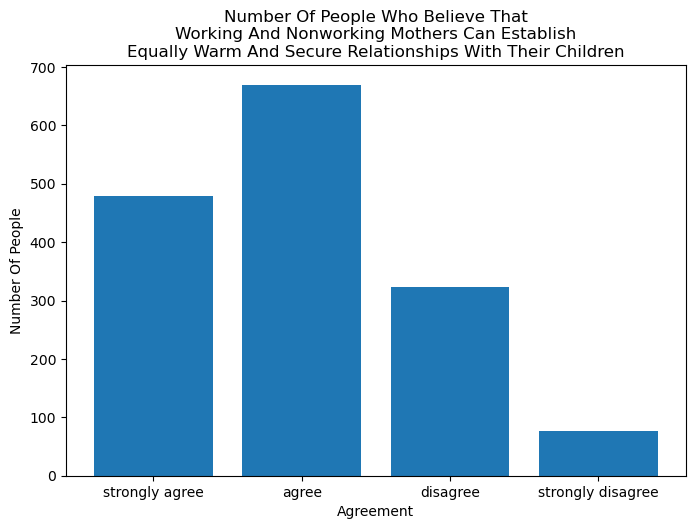

In [24]:
plt.figure(figsize = (6*4/3, 4*4/3))
plt.bar(sorted_value_counts.index, sorted_value_counts.values)
plt.title('Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children')
plt.ylabel('Number Of People')
plt.xlabel('Agreement')

Text(0.5, 0, 'Agreement')

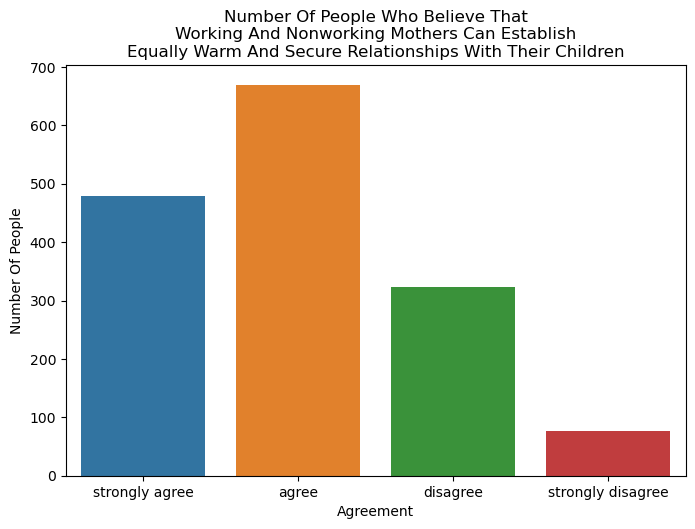

In [37]:
plt.figure(figsize = (6*4/3, 4*4/3))
sns.barplot(x = sorted_value_counts.index, y = sorted_value_counts.values)
plt.title('Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children')
plt.ylabel('Number Of People')
plt.xlabel('Agreement')

<AxesSubplot:title={'center':'Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children'}, xlabel='Agreement', ylabel='Number Of People'>

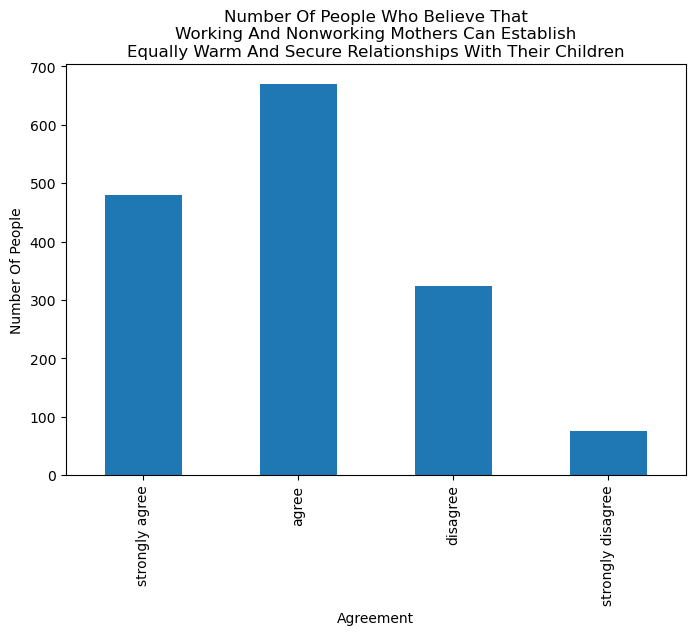

In [28]:
sorted_value_counts.plot(
    kind = 'bar',
    title = 'Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children',
    ylabel = 'Number Of People',
    xlabel = 'Agreement',
    figsize = (6*4/3, 4*4/3)
)

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [50]:
grouped_value_counts = gss_clean.groupby(['relationship', 'sex']).size().reset_index().rename(columns = {0: 'count'})
grouped_value_counts

,relationship,sex,count
0,strongly agree,female,337
1,strongly agree,male,143
2,agree,female,344
3,agree,male,326
4,disagree,female,146
5,disagree,male,178
6,strongly disagree,female,39
7,strongly disagree,male,37


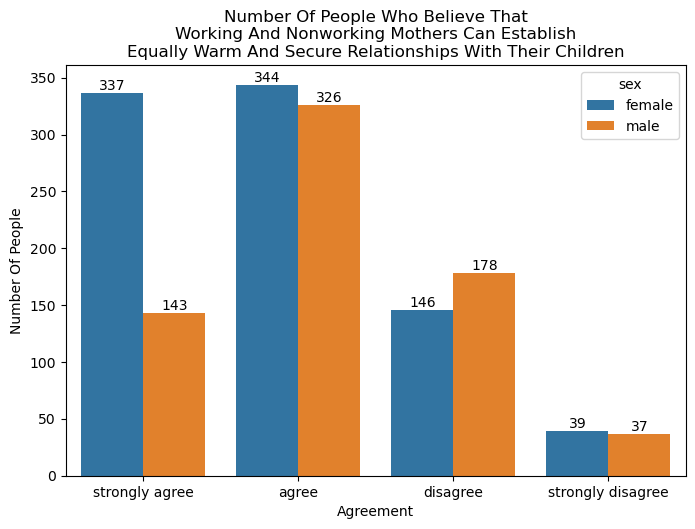

In [68]:
plt.figure(figsize = (6*4/3, 4*4/3))
bar_plot = sns.barplot(data = grouped_value_counts, x = 'relationship', y = 'count', hue = 'sex')
plt.title('Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children')
plt.ylabel('Number Of People')
plt.xlabel('Agreement')
for rect in bar_plot.patches:
    x_coordinate = rect.get_x() + 0.5 * rect.get_width()
    y_coordinate = rect.get_height()
    plt.text(x_coordinate, y_coordinate, str(int(y_coordinate)), horizontalalignment = 'center', verticalalignment = 'bottom')

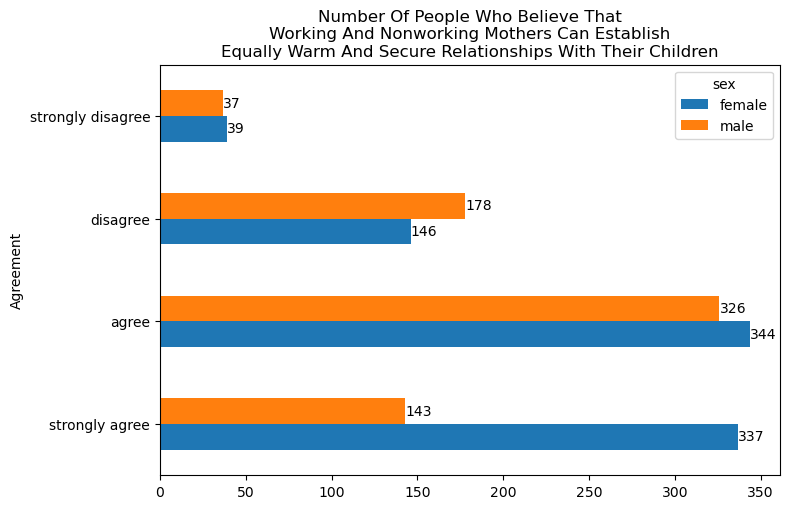

In [69]:
bar_plot = grouped_value_counts.pivot_table(values = 'count', index = 'relationship', columns = 'sex').plot(
    kind = 'barh',
    title = 'Number Of People Who Believe That\nWorking And Nonworking Mothers Can Establish\nEqually Warm And Secure Relationships With Their Children',
    ylabel = 'Number Of People',
    xlabel = 'Agreement',
    figsize = (6*4/3, 4*4/3)
)
for rect in bar_plot.patches:
    x_coordinate = rect.get_width()
    y_coordinate = rect.get_y() + .5*rect.get_height()
    plt.text(x_coordinate, y_coordinate, str(int(x_coordinate)), horizontalalignment='left', verticalalignment='center')

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]